In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('marathon-data.csv')
df.shape

(37250, 4)

In [6]:
df.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [7]:
df.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [8]:
from datetime import timedelta

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv', converters={'split':convert_time, 'final': convert_time})

data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [9]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [15]:
data['split_sec'] = data['split'].dt.total_seconds()
data['final_sec'] = data['final'].dt.total_seconds()

data['split_min'] = data['split'].dt.total_seconds()/60
data['final_min'] = data['final'].dt.total_seconds()/60
data.head()

,age,gender,split,final,split_sec,final_sec,split_min,final_min
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,65.633333,128.850000
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,66.433333,129.466667
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,66.816667,130.700000
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,66.266667,133.750000
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,66.533333,133.983333


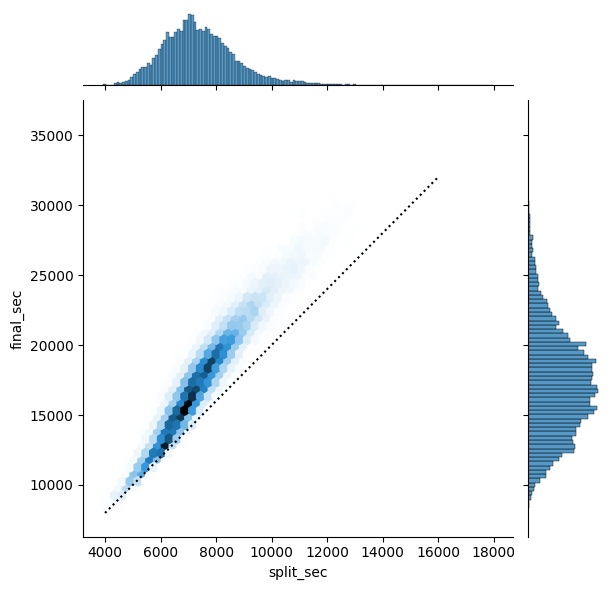

In [14]:
g = sns.jointplot(data=data, x='split_sec', y='final_sec', kind='hex')
g.ax_joint.plot(np.linspace(4000,16000), np.linspace(8000,32000), ':k')

plt.show()

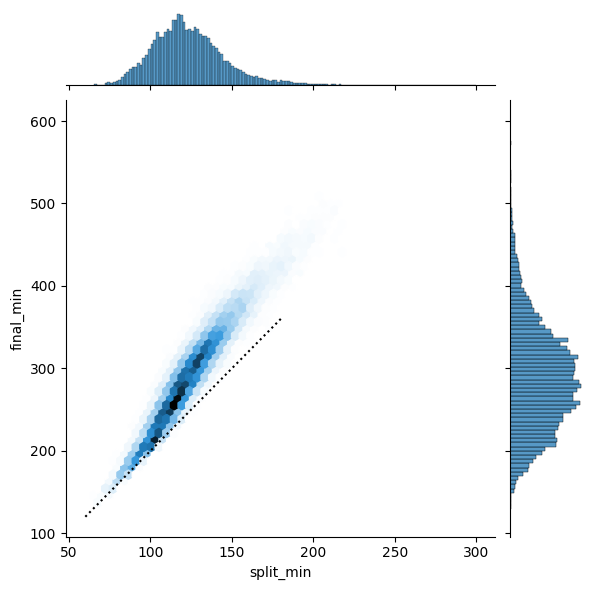

In [18]:
g = sns.jointplot(data=data, x='split_min', y='final_min', kind='hex')
g.ax_joint.plot(np.linspace(60,180), np.linspace(120,360), ':k')

plt.show()

In [22]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

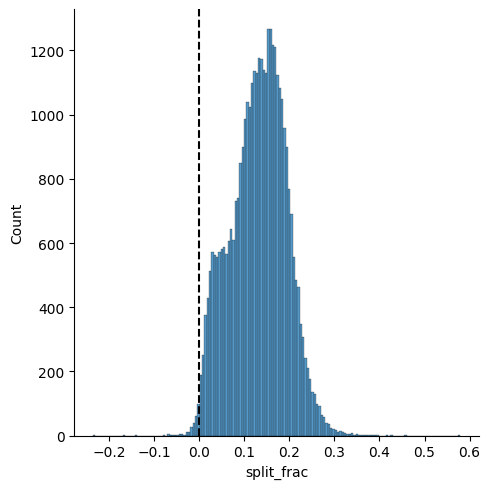

In [25]:
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle='--')
plt.show()

In [26]:
sum(data.split_frac < 0)

251

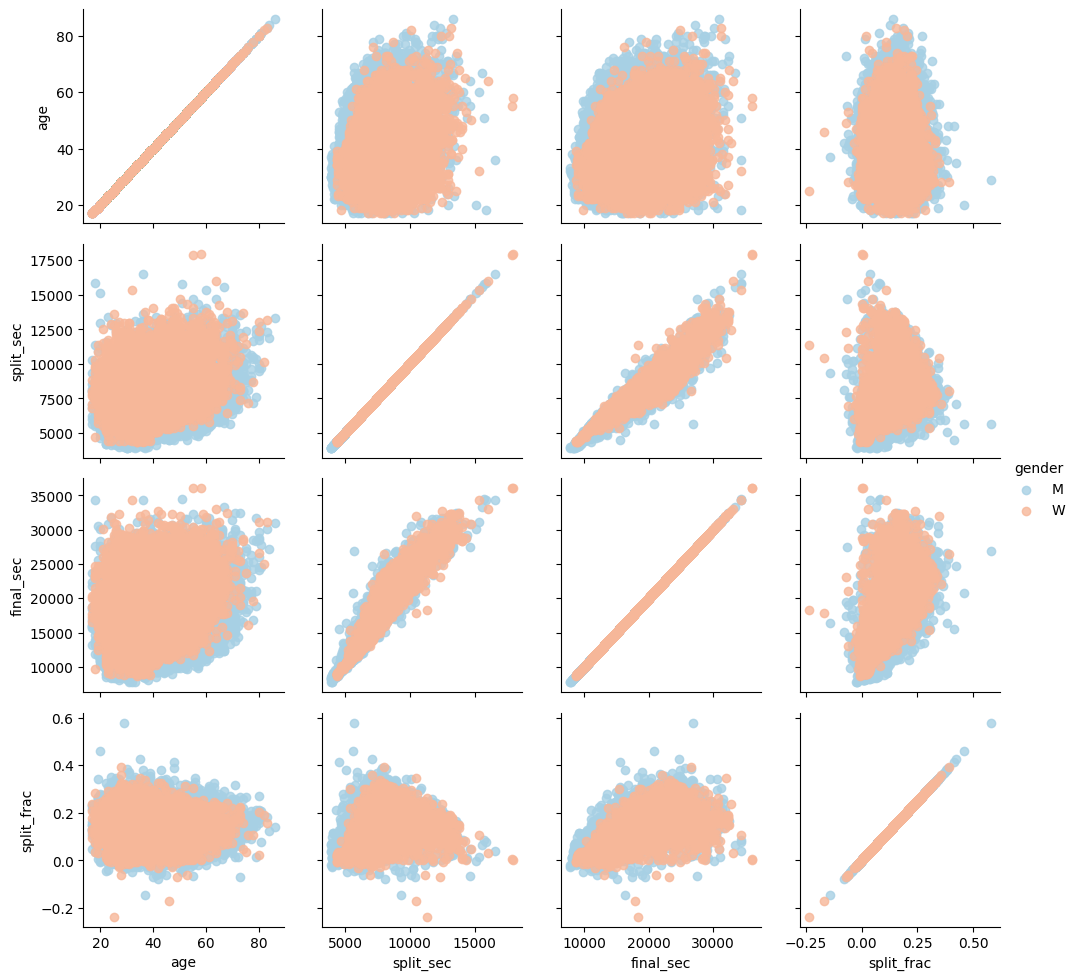

In [33]:
g = sns.PairGrid(data, vars=['age','split_sec','final_sec','split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()
plt.show()